SOK-1006 V23
Mappeoppgave 2 - Innføring av bompenger i Tromsø: Effekt på bilisters atferd og velferd

**Kapittel 1 - Innledning**

Hva er bompenger?

    "Bompenger er avgiften du som bilist betaler når du ferdes på en vei som trenger finansiering utover offentlige midler."

    "Bompengene kan kreves inn i forkant av- eller under utbyggingen av et prosjekt, men i de fleste tilfeller innkreves de når prosjektet er ferdigstilt og du benytter den nye veien." [1] (https://skyttelpass.no/, 2022)

Man benytter hovedsaklig bompenger til å finansiere veier som bygges av stat ellelr kommune, ved å kreve inn penger i etterkan av byggingen fra de som benytter seg av veien, gjerne med en bomring. Dette kan betales for med enkeltpasseringer eller som en abonnementsordning med brikke i frontruta.
Andre ting som er blitt mer vanlig å finansiere med bompengene er trafikkbildet i sin helhet med kollektivtilbud, sykkelveier og gangveier.

Bompenger skal også, hvertfall i Norge, være med på å skape insentiv for trafikanter til å ta mer bærekraftige valg. Slik at flere velger å gå, sykle eller ta kollektivt fremfor å kjøre bil. Dette er også et av hovedargumentene for å innføre bompenger i Tromsø.
Mens prisdiskrimineringen mellom diesel/bensin- og elbiler når det kommer til bompenger er ett insentiv for at de som må eller velger å kjøre bil, skal velge alternativer med lavere totalutslipp. Samt at rushtidsavgift er et insentiv for å spre trafikken utover dagen, slik at det ikke blir så mye kø i rushtiden.

Utredningen vil i Kapittel 2 bestå av en gjennomgang av data over trafikkaktivitet inn og ut av Tromsøya i Januar til Juni 2022 og 2023, samt data for påstigninger på buss i fra Januar til April i 2022 og 2023, slik at vi kan se på endringene av trafikkmengden over samme perioder i 2022 og 2023, både før og etter inføring av bompenger.

I kapittel 3 vil vi analysere en bilists tilpassing i markedet, både før og etter innføringen av bompenger, og vi vil da se om teorien samsvarer med dataen vi har tilgjengelig, og om vi kan se tegn av de ønskede effektene.

**Kapittel 2 - Trafikkbildet i Tromsø før og etter innføring av bompenger**

I 2022 var den gjennomsnittlig årlige kjørelengden i Tromsø kommune på 514,7 millioner kilometer totalt sett. [2] (Statistisk sentralbyrå, 2023)

Vi skal nå se på hvordan trafikkbildet i Tromsø har endret seg det siste året, ved bruk av trafikkpunkter fra Statens vegvesen. Vi skal se på deler av trafikken i Tromsø i 2022, før innføringen av bompenger, og i 2023, etter innføringen av bompenger.
Vi vil da se på trafikkpunktene inn og ut av Tromsøya: Tromsøbrua, Sandnessundbrua og Tromsøytunnelen.

In [475]:
import sympy as sp
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt

df = pd.read_csv(r'G:\UiT_Fag\SOK-1006\Mappeoppgaver\Mappeoppgave_2\Trafikkpunkter.csv', delimiter=';')
df = df[df['Felt'] == 'Totalt'] 
df = df.drop(['Fra', 'Til', 'Antall timer total', 'Antall timer inkludert', 'Lengdekvalitetsgrad (%)', 'Ikke gyldig lengde', 'Antall timer ugyldig'], axis=1)
df = df.drop(['< 5,6m', '>= 5,6m', '5,6m - 7,6m', '7,6m - 12,5m', '12,5m - 16,0m', '>= 16,0m', '16,0m - 24,0m', '>= 24,0m', 'Dekningsgrad (%)'], axis=1)
df['Dato'] = pd.to_datetime(df['Dato'], format='%d.%m.%Y')
df['Trafikkmengde'] = df['Trafikkmengde'].apply(pd.to_numeric, errors='coerce')
df = df.groupby('Dato')['Trafikkmengde'].sum().reset_index()
df = df.set_index('Dato')
df = pd.concat([df.loc['2022-01-05':'2022-06-05'], df.loc['2023-01-05':'2023-06-05']]).reset_index()



Figur 1 og 2 viser trafikken inn og ut av Tromsøya i preiodene Januar til Juni, i både 2022 og 2023.

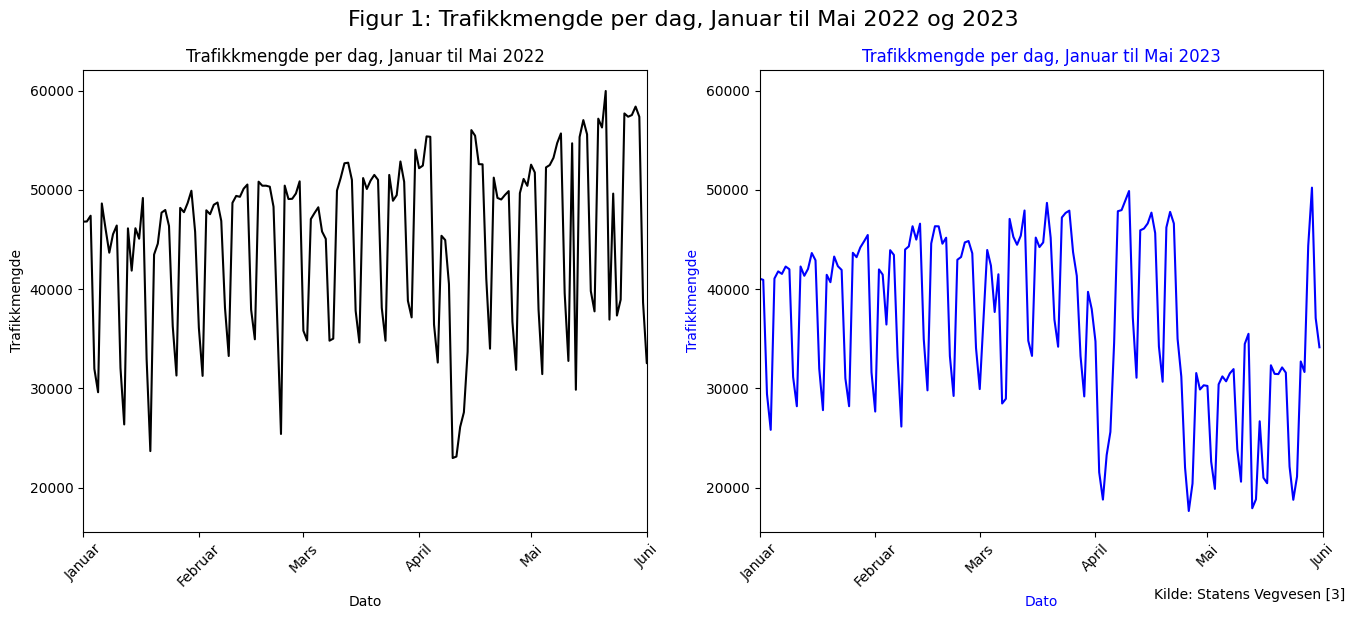

In [476]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plt.suptitle('Figur 1: Trafikkmengde per dag, Januar til Mai 2022 og 2023', fontsize=16)

axes[0].plot(df['Dato'], df['Trafikkmengde'], color='black')
axes[0].set_title('Trafikkmengde per dag, Januar til Mai 2022')
axes[0].set_xlabel('Dato')
axes[0].set_ylabel('Trafikkmengde')
axes[0].set_xlim([dt.date(2022, 1, 5), dt.date(2022, 6, 5)])
axes[0].set_xticks([dt.date(2022, 1, 5), dt.date(2022, 2, 5), dt.date(2022, 3, 5), dt.date(2022, 4, 5), dt.date(2022, 5, 5), dt.date(2022, 6, 5)])
axes[0].set_xticklabels(['Januar', 'Februar', 'Mars', 'April', 'Mai', 'Juni'], rotation=45)

axes[1].plot(df['Dato'], df['Trafikkmengde'], color='blue')
axes[1].set_title('Trafikkmengde per dag, Januar til Mai 2023', color='blue')
axes[1].set_xlabel('Dato', color='blue')
axes[1].set_ylabel('Trafikkmengde', color='blue')
axes[1].set_xlim([dt.date(2023, 1, 5), dt.date(2023, 6, 5)])
axes[1].set_xticks([dt.date(2023, 1, 5), dt.date(2023, 2, 5), dt.date(2023, 3, 5), dt.date(2023, 4, 5), dt.date(2023, 5, 5), dt.date(2023, 6, 5)])
axes[1].set_xticklabels(['Januar', 'Februar', 'Mars', 'April', 'Mai', 'Juni'], rotation=45)

plt.annotate('Kilde: Statens Vegvesen [3]', (0.7,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')

plt.show()

In [477]:
df2 = df
df2['Dato'] = df2.Dato - pd.offsets.MonthBegin(1)
df2 = df2.groupby('Dato')['Trafikkmengde'].sum().reset_index()
df2['Trafikkmengde'] = (df2['Trafikkmengde'] / 1000)

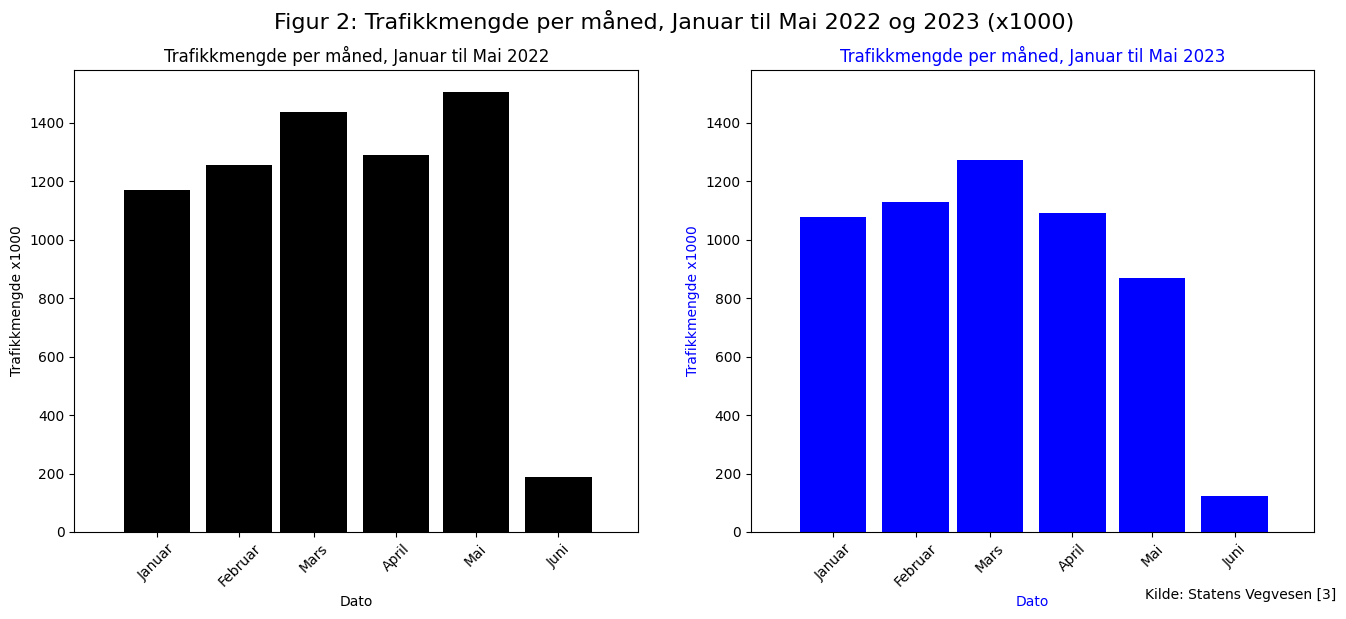

In [478]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plt.suptitle('Figur 2: Trafikkmengde per måned, Januar til Mai 2022 og 2023 (x1000)', fontsize=16)

axes[0].bar(df2['Dato'], df2['Trafikkmengde'], color='black', width=25)
axes[0].set_title('Trafikkmengde per måned, Januar til Mai 2022')
axes[0].set_xlabel('Dato')
axes[0].set_ylabel('Trafikkmengde x1000')
axes[0].set_xlim([dt.date(2021, 12, 1), dt.date(2022, 7, 1)])
axes[0].set_xticks([dt.date(2022, 1, 1), dt.date(2022, 2, 1), dt.date(2022, 3, 1), dt.date(2022, 4, 1), dt.date(2022, 5, 1), dt.date(2022, 6, 1)])
axes[0].set_xticklabels(['Januar', 'Februar', 'Mars', 'April', 'Mai', 'Juni'], rotation=45)

axes[1].bar(df2['Dato'], df2['Trafikkmengde'], color='blue', width=25)
axes[1].set_title('Trafikkmengde per måned, Januar til Mai 2023', color='blue')
axes[1].set_xlabel('Dato', color='blue')
axes[1].set_ylabel('Trafikkmengde x1000', color='blue')
axes[1].set_xlim([dt.date(2022, 12, 1), dt.date(2023, 7, 1)])
axes[1].set_xticks([dt.date(2023, 1, 1), dt.date(2023, 2, 1), dt.date(2023, 3, 1), dt.date(2023, 4, 1), dt.date(2023, 5, 1), dt.date(2023, 6, 1)])
axes[1].set_xticklabels(['Januar', 'Februar', 'Mars', 'April', 'Mai', 'Juni'], rotation=45)

plt.annotate('Kilde: Statens Vegvesen [3]', (0.7,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')

plt.show()

Figur 3 og 4 viser antall påstigende på buss i Tromsø i periodene Januar til Juni, i både 2022 og 2023.

In [479]:
df_buss = pd.read_csv("https://raw.githubusercontent.com/uit-sok-1006-v23/uit-sok-1006-v23.github.io/main/data/antall%20p%C3%A5stigende.csv", parse_dates=['date'], dayfirst=True)
df_buss = df_buss.groupby('date')['Påstigende'].sum().reset_index()
df_buss = df_buss.set_index('date')
df_buss = pd.concat([df_buss.loc['2022-01-05':'2022-04-30'], df_buss.loc['2023-01-05':'2023-04-30']]).reset_index()

Text(0, -40, 'Kilde: Troms fylkestrafikk [4]')

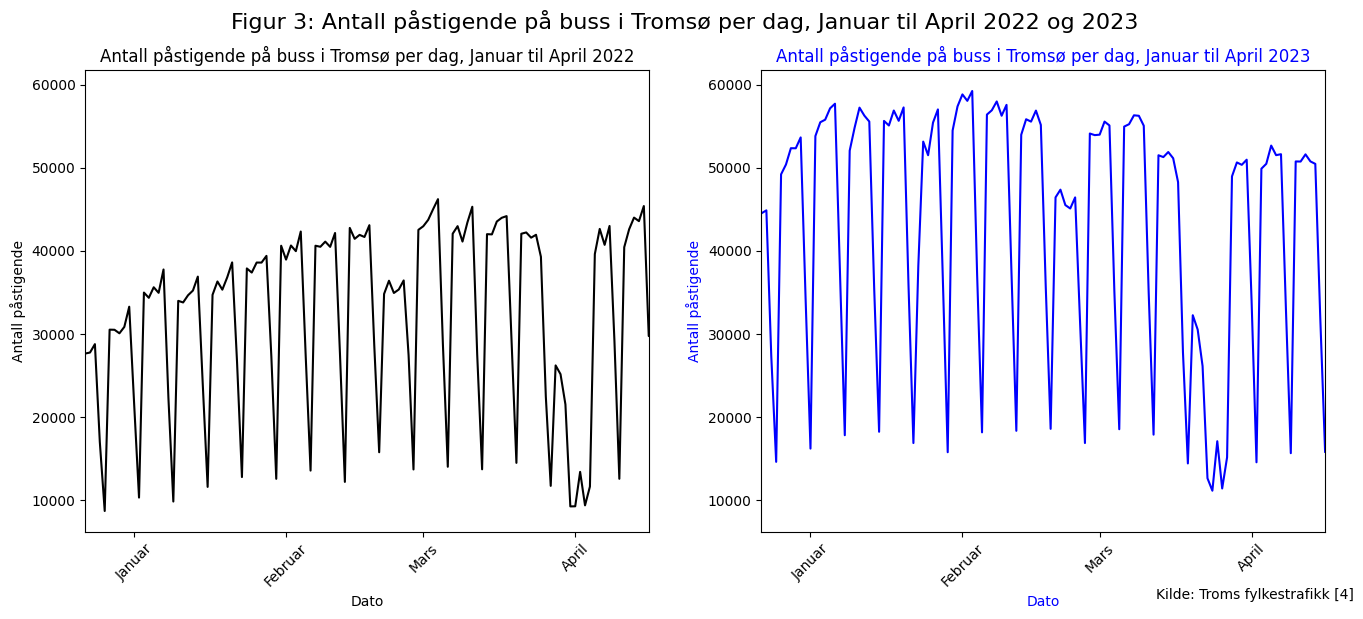

In [480]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plt.suptitle('Figur 3: Antall påstigende på buss i Tromsø per dag, Januar til April 2022 og 2023', fontsize=16)

axes[0].plot(df_buss['date'], df_buss['Påstigende'], color='black')
axes[0].set_title('Antall påstigende på buss i Tromsø per dag, Januar til April 2022')
axes[0].set_xlabel('Dato')
axes[0].set_ylabel('Antall påstigende')
axes[0].set_xlim([dt.date(2022, 1, 5), dt.date(2022, 4, 30)])
axes[0].set_xticks([dt.date(2022, 1, 15), dt.date(2022, 2, 15), dt.date(2022, 3, 15), dt.date(2022, 4, 15)])
axes[0].set_xticklabels(['Januar', 'Februar', 'Mars', 'April'], rotation=45)

axes[1].plot(df_buss['date'], df_buss['Påstigende'], color='blue')
axes[1].set_title('Antall påstigende på buss i Tromsø per dag, Januar til April 2023', color='blue')
axes[1].set_xlabel('Dato', color='blue')
axes[1].set_ylabel('Antall påstigende', color='blue')
axes[1].set_xlim([dt.date(2023, 1, 5), dt.date(2023, 4, 30)])
axes[1].set_xticks([dt.date(2023, 1, 15), dt.date(2023, 2, 15), dt.date(2023, 3, 15), dt.date(2023, 4, 15)])
axes[1].set_xticklabels(['Januar', 'Februar', 'Mars', 'April'], rotation=45)

plt.annotate('Kilde: Troms fylkestrafikk [4]', (0.7,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')

In [481]:
df2_buss = df_buss
df2_buss['date'] = df2_buss.date - pd.offsets.MonthBegin(1)
df2_buss = df2_buss.groupby('date')['Påstigende'].sum().reset_index()
df2_buss['Påstigende'] = (df2_buss['Påstigende'] / 1000).round(0)

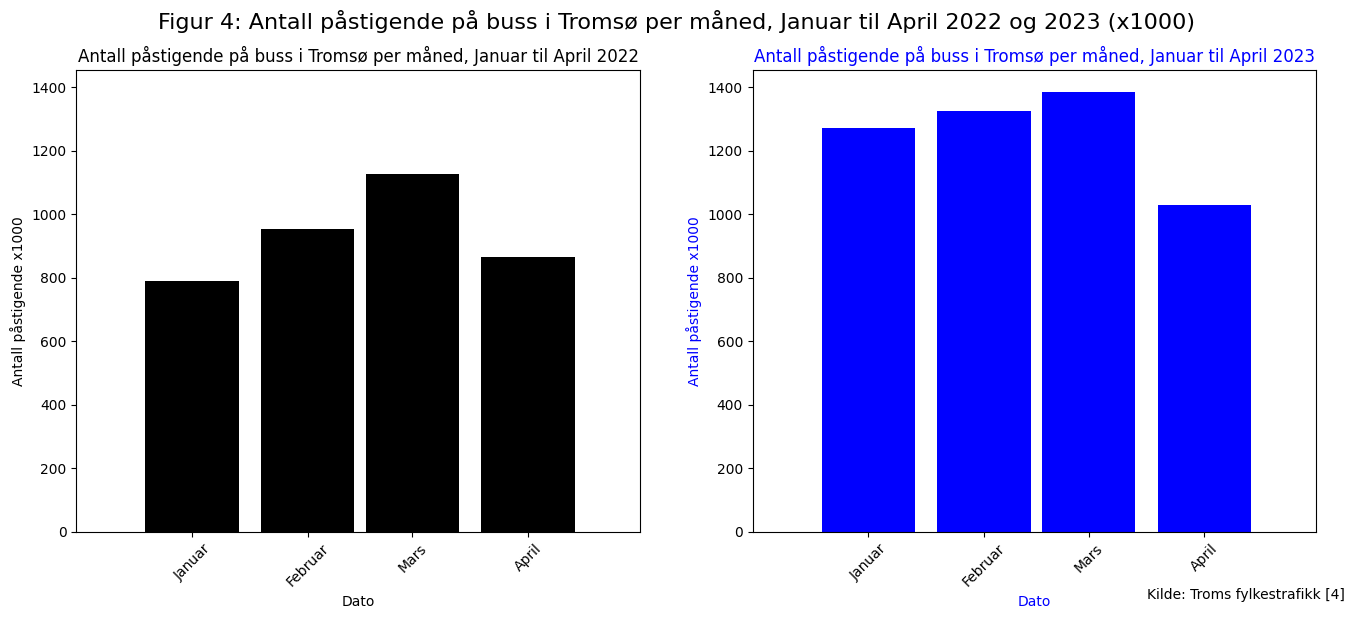

In [482]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plt.suptitle('Figur 4: Antall påstigende på buss i Tromsø per måned, Januar til April 2022 og 2023 (x1000)', fontsize=16)

axes[0].bar(df2_buss['date'], df2_buss['Påstigende'], color='black', width=25)
axes[0].set_title('Antall påstigende på buss i Tromsø per måned, Januar til April 2022')
axes[0].set_xlabel('Dato')
axes[0].set_ylabel('Antall påstigende x1000')
axes[0].set_xlim([dt.date(2021, 12, 1), dt.date(2022, 5, 1)])
axes[0].set_xticks([dt.date(2022, 1, 1), dt.date(2022, 2, 1), dt.date(2022, 3, 1), dt.date(2022, 4, 1)])
axes[0].set_xticklabels(['Januar', 'Februar', 'Mars', 'April'], rotation=45)

axes[1].bar(df2_buss['date'], df2_buss['Påstigende'], color='blue', width=25)
axes[1].set_title('Antall påstigende på buss i Tromsø per måned, Januar til April 2023', color='blue')
axes[1].set_xlabel('Dato', color='blue')
axes[1].set_ylabel('Antall påstigende x1000', color='blue')
axes[1].set_xlim([dt.date(2022, 12, 1), dt.date(2023, 5, 1)])
axes[1].set_xticks([dt.date(2023, 1, 1), dt.date(2023, 2, 1), dt.date(2023, 3, 1), dt.date(2023, 4, 1)])
axes[1].set_xticklabels(['Januar', 'Februar', 'Mars', 'April'], rotation=45)

plt.annotate('Kilde: Troms fylkestrafikk [4]', (0.7,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')

plt.show()

Av figurene kan vi se at trafikken inn og ut av Tromsøya har gått ned i 2023, sammenlignet med 2022. Dette gjelder både for Tromsøbrua, Sandnessundbrua og Tromsøytunnelen. Vi kan også se at antall påstigende på buss har gått opp i 2023, sammenlignet med 2022. Dette kan tyde på at bompengene har hatt en effekt på trafikkbildet i Tromsø, og at flere velger å ta buss fremfor å kjøre bil.

Dette samsvarer med ønsket om å få flere til å velge mer bærekraftige alternativer, og at bompengene skal være med på å skape insentiv for dette.

**Kapittel 3 - Bilisters tilpasning til bompenger**

Vi skal nå se på hvordan en bilist vil tipasse seg både før og etter innføringen av bompenger. 

Til dette vil vi bruke en Stone-Geary nyttefunksjon, som er en funksjon som beskriver en forbrukers preferanser for to varer. I vårt tilfelle vil vi se på to varer, bompenger og andre varer. Jeg har valgt Stone-Geary da denne bedre representerer en konsuments tilpassing til prisendringer, enn en Cobb-Douglas nyttefunksjon, siden den inkluderer ett minimumsforbruk som kan ansees som en nødvendig utgift.

Siden adferdsrelevante transportkostnader hovedsakelig inkluderer kostnader til reisemønsteret, og gjerne ignorerer forsikringspremie og slitasje på bilen, vil vi bruke en transportkostnad på kr 1,125 per kilometer for en bil med forbrenningsmotor. [5] (Transportøkonomisk institutt, 2023)

Vi vil se på en bilist som har følgende nyttefunksjon: 

Med god hjelp fra oppskrift i forelesningsnotater. [6] (Clark, 2023)

\begin{equation}
   U(x_1, x_2) = \beta_1 ln (x_1-\gamma_1) + \beta_2 ln (x_2-\gamma_2) 
\end{equation}

hvor $\beta_1+\beta_2=1$, og $\gamma_1>0, \gamma_2>0$.  

---------------------------------------------------------------------------------------------------------------------------------------------------------

Vi antar at $\gamma_1=\gamma_2=1, \beta_1=0.5, \beta_2=0.5, p_1=1.125, p_2=1, m=50$ i utgangspunktet.

$p_1$ er transportkostnaden per kilometer, og $p_2$ er prisen på andre varer. $m$ er budsjettet til bilisten.



In [483]:
# definer symboler

bta_1, bta_2, gma_1, gma_2 = sp.symbols('\u03B2_1 \u03B2_2 \gamma_1 \gamma_2', real=True, positive=True)
x_1, x_2, p_1, p_2, m=sp.symbols("x_1 x_2 p_1 p_2 m", real=True, positive=True)

# etterspørsel etter transport
x_1_eq = gma_1 + (bta_1/p_1)*(m-p_1*gma_1-p_2*gma_2)

# nytte
nytte_sg = bta_1*sp.log(x_1-gma_1) + (1-bta_1)*sp.log(x_2-gma_2)

# etterpørsel etter andre goder
x_2_eq = gma_2 + (bta_2/p_2)*(m-p_1*gma_1-p_2*gma_2)

# budsjett x_2 = m/p_2 - p_1x_1/p_2
def budsjett(M, x_1, p_1, p_2):
    return M/p_2 - (p_1*x_1/p_2)


# oppnåd nytte i likevekt
V = nytte_sg.subs([(x_1, x_1_eq), (x_2, x_2_eq)])
V

β_1*log(β_1*(-\gamma_1*p_1 - \gamma_2*p_2 + m)/p_1) + (1 - β_1)*log(β_2*(-\gamma_1*p_1 - \gamma_2*p_2 + m)/p_2)

In [484]:
# funksjon for indifferenskurve
U_0=sp.symbols('U_0', real = True, positive=True)

ind_k = sp.solve(nytte_sg-U_0, x_2)[0]
display(ind_k)

\gamma_2 + exp((-U_0 + β_1*log(-\gamma_1 + x_1))/(β_1 - 1))

In [485]:
# lag funksjon
def ind_k_fn(bta_1,gma_1,gma_2,x_1,U_0):
    return gma_2 + np.exp((bta_1*np.log(x_1-gma_1)-U_0)/(bta_1-1))

In [486]:
# sett inn verdier

x_1_eq_num = float(x_1_eq.subs([(bta_1, 0.5), (gma_1, 1), (gma_2, 1), (m, 50), (p_1, 1.125), (p_2, 1)]))
x_2_eq_num = float(x_2_eq.subs([(bta_2, 0.5), (gma_1, 1), (gma_2, 1), (m, 50), (p_1, 1.125), (p_2, 1)]))
nytte_sg_num = float(V.subs([(bta_1, 0.5),(bta_2, 0.5), (gma_1, 1), (gma_2, 1), (m, 50), (p_1, 1.125), (p_2, 1)]))
display(x_1_eq_num)
display(x_2_eq_num)
display(nytte_sg_num)

22.27777777777778

24.9375

3.116554749112673

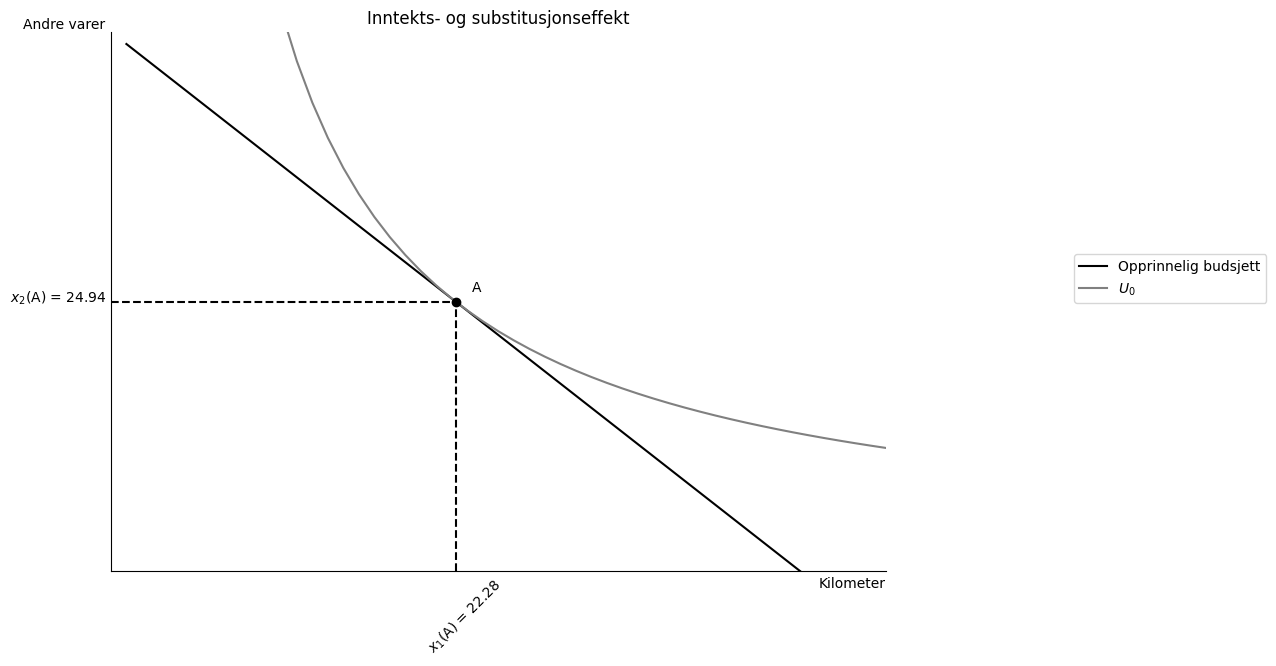

In [487]:
# plotte opprinnelig budsjett og indifferenskurve

def create_ax():
                fig, ax = plt.subplots(figsize=(10,7))
                ax.set_ylabel('Andre varer', loc='top', rotation=0)
                ax.set_xlabel('Kilometer', loc='right')
                ax.set(xlim=(0,100))
                ax.set(ylim=(0,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

# lag X som sikrer x-gma>0
X = np.linspace (1.01,50,50)


fig1, ax = create_ax()
ax.set(xlim=(0,50))
ax.set(ylim=(0,50))

# ta bort tall på aksene
ax.set_xticks([], [])
ax.set_yticks([], [])


ax.plot(X, budsjett(50, X, 1.125, 1), color='black', label='Opprinnelig budsjett')
ax.plot(X, ind_k_fn(.5,1,1,X,nytte_sg_num), color='grey',label='$U_0$')

ax.vlines(x_1_eq_num, 0, x_2_eq_num, ls='dashed', color='black')
ax.hlines(x_2_eq_num, 0, x_1_eq_num, ls='dashed', color='black')

ax.annotate('$x_1$(A) = '+str(round(x_1_eq_num,2)), (x_1_eq_num-2, -7.5), annotation_clip=False, fontsize=10, rotation=45)
ax.annotate('$x_2$(A) = '+str(round(x_2_eq_num,2)), (-6.5, x_2_eq_num), annotation_clip=False)
ax.annotate('A', (x_1_eq_num+1,x_2_eq_num+1))
ax.plot(x_1_eq_num, x_2_eq_num , marker='o', color='black')



# tittel
ax.set_title('Inntekts- og substitusjonseffekt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));

Vår bilist bor 10 kilometer fra jobb, og har ett budsjett på 50 kroner. Vi skal nå se på hvordan bilistens forbruk av kjørekostnader og andre varer endrer seg når bompenger innføres.

Bilisten kjører starter og slutter på jobb innenfor rushtiden, og kjører derfor gjennom bomringen 2 ganger om dagen til rushtidsavgift. Med brikke blir dette kr 28,80 hver vei, og kr 2,88 per kilometer.

Transportkostnaden er nå på kr 1,125 + kr 2,88 = kr 4,005 per kilometer. Men vi runder av til kr 4.

In [488]:
# beregne nye verdier

x_1_eq_ny = float(x_1_eq.subs([(bta_1, 0.5), (gma_1, 1), (gma_2, 1), (m, 50), (p_1, 4), (p_2, 1)]))
x_2_eq_ny = float(x_2_eq.subs([(bta_2, 0.5), (gma_1, 1), (gma_2, 1), (m, 50), (p_1, 4), (p_2, 1)]))
nytte_sg_ny = float(V.subs([(bta_1, 0.5),(bta_2, 0.5), (gma_1, 1), (gma_2, 1), (m, 50), (p_1, 4), (p_2, 1)]))


display(x_1_eq_ny)
display(x_2_eq_ny)
display(nytte_sg_ny)

6.625

23.5

2.420368128650429

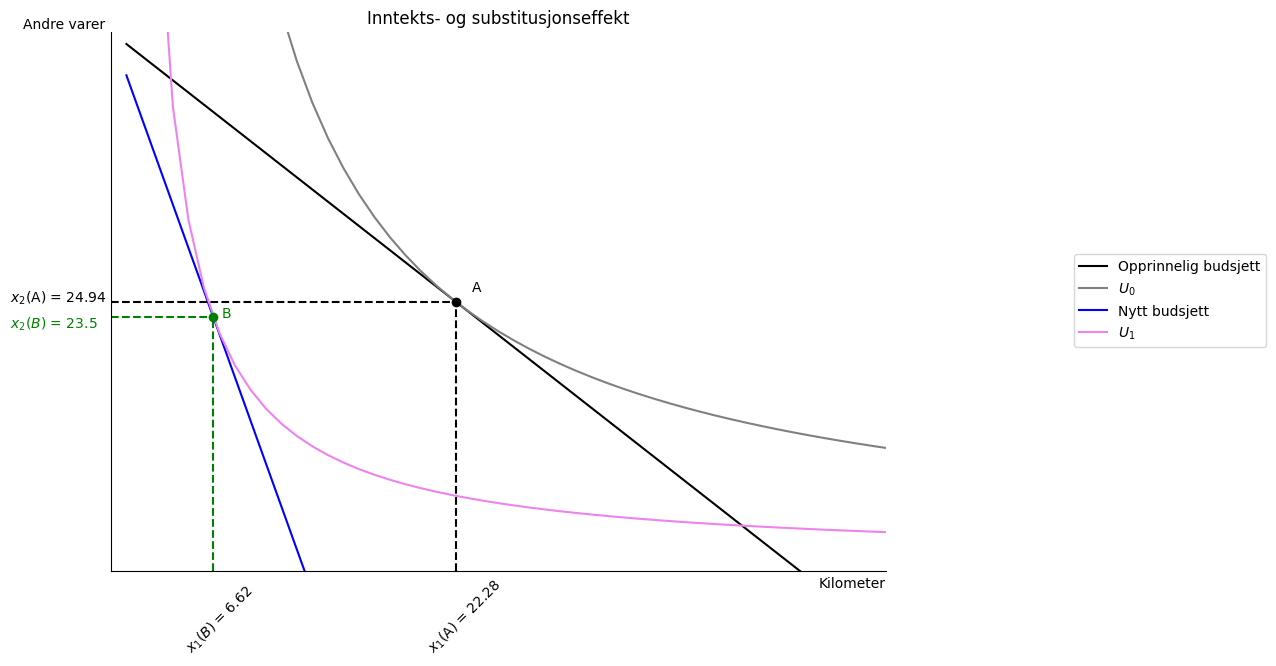

In [489]:
# legg nye verdier på tegningen

ax.plot(X, budsjett(50, X, 4, 1), color='blue', label='Nytt budsjett')
ax.plot(X, ind_k_fn(.5,1,1,X,nytte_sg_ny), color='violet', label='$U_1$')

ax.vlines(x_1_eq_ny, 0, x_2_eq_ny, ls='dashed', color='green')
ax.hlines(x_2_eq_ny, 0, x_1_eq_ny, ls='dashed', color='green')

ax.annotate('$x_1(B)$ = '+str(round(x_1_eq_ny,2)), (x_1_eq_ny-2, -7.5), annotation_clip=False, fontsize=10, rotation=45)
ax.annotate('$x_2(B)$ = '+str(round(x_2_eq_ny,2)), (-6.5, x_2_eq_ny-1), color= 'green', annotation_clip=False)
ax.annotate('B', (x_1_eq_ny+.5,x_2_eq_ny), color='green')
ax.plot(x_1_eq_ny, x_2_eq_ny , marker='o', color='green')

ax.legend(bbox_to_anchor=(1.5,0.6))
fig1

In [490]:
# beregn inntekt som kreves for like nytte etter prisendring

# finn først hvordan oppnådd nytte er avhengig av inntekt gitt nye priser

V_m = V.subs([(bta_1, 0.5),(bta_2, 0.5), (gma_1, 1), (gma_2, 1), (p_1, 4), (p_2, 1)])
V_m

0.5*log(0.125*m - 0.625) + 0.5*log(0.5*m - 2.5)

In [491]:
# hvilken verdi for m gir opprinnelig nytte?

sp.solve(V_m-3, m)[0]

85.3421476927507

In [492]:
# Sjekker hvilken m verdier som gir V_m-nytte_sg_num=0

fikt_m = sp.nsolve(V_m-nytte_sg_num, m, 85)
fikt_m

95.2739657314826

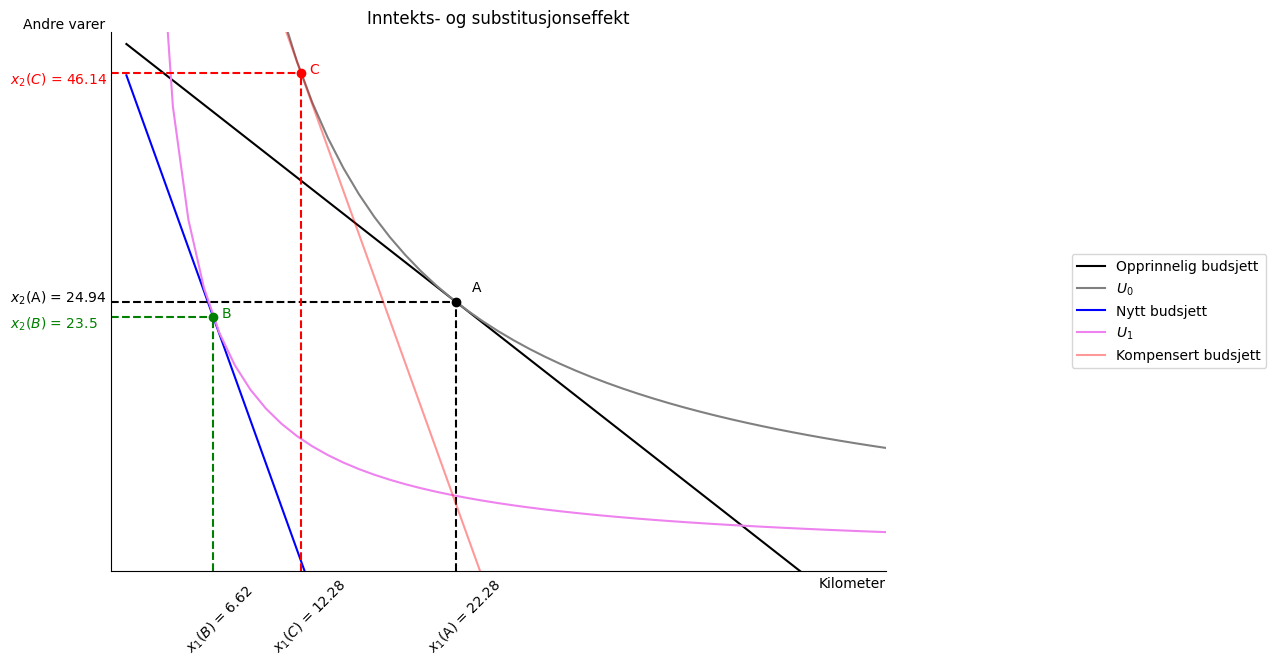

In [493]:
# inntekten som ville kompenser for prisendringen er 95.274
# med denne inntekten kan konsumenten få samme nytte som i utgangspunktet til de nye prisene.

# verdier
x_1_eq_komp = float(x_1_eq.subs([(bta_1, 0.5), (gma_1, 1), (gma_2, 1), (m, fikt_m), (p_1, 4), (p_2, 1)]))
x_2_eq_komp = float(x_2_eq.subs([(bta_2, 0.5), (gma_1, 1), (gma_2, 1), (m, fikt_m), (p_1, 4), (p_2, 1)]))

# tegne inn "kompensert budsjett"

ax.plot(X, budsjett(fikt_m, X, 4, 1), color='red', alpha=.4, label='Kompensert budsjett')

ax.vlines(x_1_eq_komp, 0, x_2_eq_komp, ls='dashed', color='red')
ax.hlines(x_2_eq_komp, 0, x_1_eq_komp, ls='dashed', color='red')

ax.annotate('$x_1(C)$ = '+str(round(x_1_eq_komp,2)), (x_1_eq_komp-2, -7.5), annotation_clip=False, fontsize=10, rotation=45)
ax.annotate('$x_2(C)$ = '+str(round(x_2_eq_komp,2)), (-6.5, x_2_eq_komp-1), color= 'red', annotation_clip=False)
ax.annotate('C', (x_1_eq_komp+.5,x_2_eq_komp), color='red')
ax.plot(x_1_eq_komp, x_2_eq_komp , marker='o', color='red')

ax.legend(bbox_to_anchor=(1.5,0.6))
fig1

In [494]:
# tabell for å vise effekten av prisendringen

from IPython.display import Markdown

tbl=f"""
|    Gode     | Substitusjonseffekt|  Inntektseffekt  |  Total effekt  |
| :----------------------| :------------------| :------------------------| :--------------|
| 1 | ${np.round(float(x_1_eq_komp-x_1_eq_num),2)}$|${np.round(float(x_1_eq_ny-x_1_eq_komp),2)}$| ${np.round(float(x_1_eq_ny-x_1_eq_num),2)}$     |
| 2 |${np.round(float(x_2_eq_komp-x_2_eq_num),2)}$ | ${np.round(float(x_2_eq_ny-x_2_eq_komp),2)}$ |  ${np.round(float(x_2_eq_ny-x_2_eq_num),2)}$    |

"""
display(Markdown(tbl))


|    Gode     | Substitusjonseffekt|  Inntektseffekt  |  Total effekt  |
| :----------------------| :------------------| :------------------------| :--------------|
| 1 | $-9.99$|$-5.66$| $-15.65$     |
| 2 |$21.2$ | $-22.64$ |  $-1.44$    |



Vi ser av totaleffekten i Stone-Geary nyttefunksjonen at bilisten vil kjøre mindre. Da etterspurte kilometer faller fra 22,28 til 6,62.

Ett månedskort for buss i Tromsø koster kr 550, og dersom man benytter seg av dette 20 kilometer per dag, 5 dager i uken over 47 uker, vil dette løpe på kr 1,40 per kilometer.

Siden antall kilometer etterspurt faller til under det som er daglig distanse til og fra jobb, og prisen på buss per kilometer er på kr 1,40, er det forsvarlig å anta at bilisten vil parkere bilen mesteparten av dagene til fordel for buss.

**Kapittel 4 - Konklusjon**

Som vi nå har sett, kan vi se en nedgang i trafikken inn og ut av Tromsøya, og en økning i antall påstigende på buss. 

I vår analyse av en bilist som blir påført en bompengeavgift med rushtidssats, så vi at nytten av å kjøre bil falt drastisk, og det er grunn for å tro at bilisten vil velge å ta buss fremfor å kjøre bil.

Vi ser da altså både empirisk og teoretisk bevis for at bomring kan benyttes for å redusere biltrafikken og øke kollektivtrafikken i Tromsø. Og dette er noe som er ønskelig for å redusere klimagassutslippene i Tromsø.

**Referanseliste**

[1] Skyttelpass 14/12-2022 - https://skyttelpass.no/nyhetsmagasin/hva-er-bompenger/ (hentet 04/06-2023)

[2] Statistisk sentralbyrå 2023 - https://www.ssb.no/statbank/table/12579/ (hentet 04/06-2023)

[3] Statens Vegvesen 2023 - https://www.vegvesen.no/trafikkdata/ (hentet 04/06-2023)

[4] Troms fylkestrafikk 2023 - https://github.com/uit-sok-1006-v23/uit-sok-1006-v23.github.io/blob/main/data/antall%20p%C3%A5stigende.csv (hentet 04/06-2023)

[5] Transportøkonomisk institutt 2022 - https://www.toi.no/getfile.php?mmfileid=74283 (hentet 04/06-2023)

[6] Derek J. Clark 2023 - https://github.com/uit-sok-1006-v23/sok1006-notater/blob/main/notater%20forelesning%2014%20med%20l%C3%B8sning.ipynb 

